# Install packages

In [6]:
install.packages('igraph')
install.packages("poweRlaw")

library('Matrix')
library('pracma')
library('igraph')
library('poweRlaw')

Warning message:
"package 'igraph' is in use and will not be installed"Warning message:
"package 'poweRlaw' is in use and will not be installed"Warning message:
"package 'Matrix' was built under R version 3.6.3"Warning message:
"package 'pracma' was built under R version 3.6.3"
Attaching package: 'pracma'

The following objects are masked from 'package:Matrix':

    expm, lu, tril, triu



# Preferential Attachment 1.3a

Produce such an undirected network with 1000 nodes and parameters m = 1,
α = 1, β = −1, and a = c = d = 1, b = 0. Plot the degree distribution. What is the
power law exponent?


In [3]:
# create graph
g_pa_1000 <- sample_pa_age(1000, pa.exp=1, aging.exp=-1,  m=1, directed=FALSE)



png 
  2

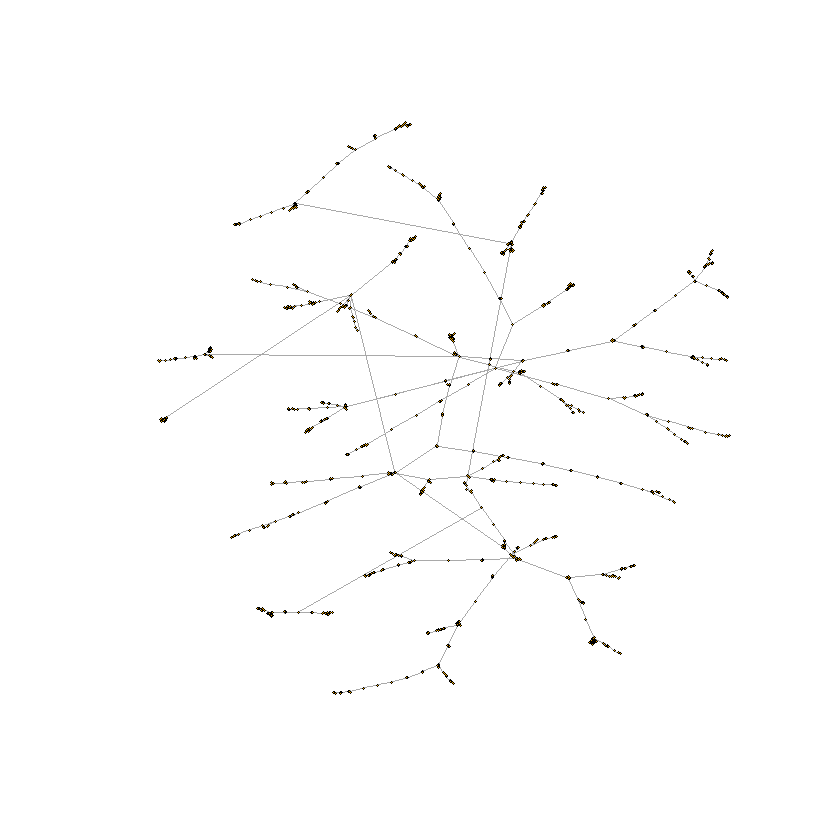

In [11]:
#plot graph

plot(g_pa_1000, vertex.size=1, vertex.label=NA)
png(file="plots/1_3_a_graph.png", width=600, height=450)

plot(g_pa_1000, vertex.size=1, vertex.label=NA)

dev.off()


png 
  2

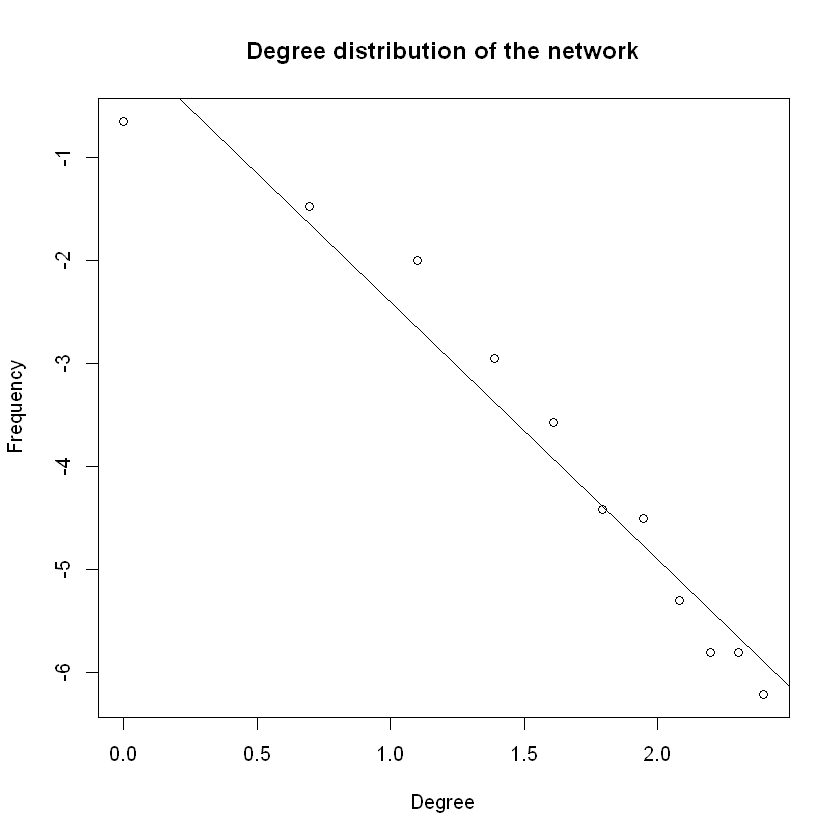

In [7]:
# plot degree dist
# get degrees present in a net along with frequencies with which they appear
degrees <- seq_along(degree.distribution(g_pa_1000)) - 1
distribution <- degree.distribution(g_pa_1000)
# convert them to collections and then to matrices
X <- matrix(c(degrees), byrow=TRUE, nrow=1)
Y <- matrix(c(distribution), byrow=TRUE, nrow=1)
# delete entries with zero frequencies from both matrices
# this allows to avoid - infinity values after log scaling and makes sense
# as these data is not actually present in the net
indices = which(Y!=0,arr.ind = T)
X <- X[indices]
Y <- Y[indices]
# log scale data
X <- log(X)
Y <- log(Y)
# select how many elements you want to delete from the end to avoid outliners
delete <- 0
# calculate len of the desired array
len <- size(X)[2] - delete
# get the slices of both matrices
X <- X[0:len]
Y <- Y[0:len]
model = lm(Y ~ X)

# plot for reference
plot(X, Y,
     main="Degree distribution of the network",
     xlab="Degree",
     ylab="Frequency",)
abline(model)

# save plot
png(file="plots/1_3_a.png", width=600, height=450)

plot(X, Y,
     main="Degree distribution of the network",
     xlab="Degree",
     ylab="Frequency",)
abline(model)

dev.off()


In [9]:

summary(model)


Call:
lm(formula = Y ~ X)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.73719 -0.25647 -0.03783  0.30717  0.65323 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.08518    0.32119   0.265    0.797    
X           -2.49487    0.18432 -13.535 2.74e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4343 on 9 degrees of freedom
Multiple R-squared:  0.9532,	Adjusted R-squared:  0.948 
F-statistic: 183.2 on 1 and 9 DF,  p-value: 2.744e-07


# 1.3b: Community Structure 

In [10]:
#Community structure
clusters_pa_1000 <- cluster_fast_greedy(g_pa_1000)
print(modularity(clusters_pa_1000))

[1] 0.9352005
